In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

In [2]:
n = 4000
d = 800

In [3]:
x = torch.randn((n, d)) / (d ** 0.5)
w = torch.zeros(d)
w[:100] = 10
w[100:200] = -10
pre_activation = torch.sum(w * x, dim=1)
activation = torch.sigmoid(pre_activation)
y = torch.sign(pre_activation)

In [4]:
# Logistic regression with stochastic gradient descent
model = SGDClassifier(penalty=None)
model.fit(x, y)

SGDClassifier(penalty=None)

In [5]:
w_hat = model.coef_[0]

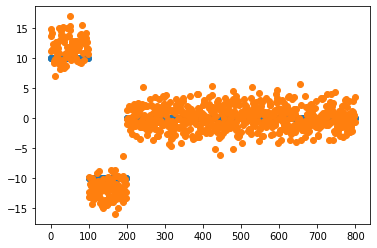

In [6]:
plt.scatter(torch.arange(d), w)
plt.scatter(torch.arange(d), w_hat)

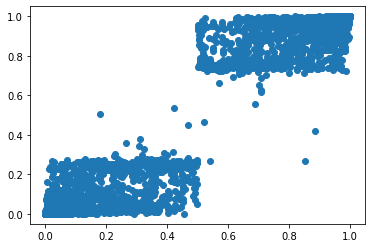

In [7]:
activation_hat = torch.sigmoid(torch.sum(torch.from_numpy(w_hat) * x, dim=1))
plt.scatter(activation, activation_hat)

In [8]:
df = pd.DataFrame()
df["index"] = torch.arange(1, 801)
df["w_star"] = w
df["w_hat"] = w_hat

In [9]:
df.to_csv("../data/log_reg_estimator_indices.csv", index=False)
df

,index,w_star,w_hat
0,1,10.0,14.856035
1,2,10.0,13.592378
2,3,10.0,11.117843
3,4,10.0,11.346574
4,5,10.0,11.347564
...,...,...,...
795,796,0.0,0.976664
796,797,0.0,0.257014
797,798,0.0,0.539296
798,799,0.0,-0.761172


In [10]:
df = pd.DataFrame()
df["true_prob"] = activation
df["pred_prob"] = activation_hat

In [11]:
df.to_csv("../data/log_reg_estimator_overconfident.csv", index=False)
df

,true_prob,pred_prob
0,0.999770,0.999723
1,0.144868,0.256344
2,0.002464,0.001097
3,0.028892,0.002284
4,0.687688,0.762333
...,...,...
3995,0.996655,0.998468
3996,0.002020,0.000721
3997,0.999756,0.999990
3998,0.163366,0.230828
